# WeRateDogs wrangling and data analysis

## Introduction

This document explores a dataset cointaing 5000 tweets, from the twitter page @dog_rates which is also known as WeRateDogs. This twitter rates dogs of people with humorous comment. We will try to analyse this rating made for different dogs. Along the process we will gather, clean and wrangle the data and get it ready for analysis. After that we will do an analysis with visualization. 

In [1]:
# load libraries
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import time
import os
import datetime
import string
import matplotlib.pyplot as plt
import math
import seaborn as sns

%matplotlib inline

# display the full string from a pandas DataFrame
pd.options.display.max_rows
#pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 10000)

## Gathering Dataset

In [2]:
# load twitter-archive-enhanced.csv
tweet_arch = pd.read_csv('twitter-archive-enhanced.csv', encoding="utf-8")
tweet_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [3]:
# Retrieve image-predictions.tsv file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
# Image predictions data 
response = requests.get(url)
with open(url.split('/')[-1].replace('-', '_'), 'wb') as file: 
    file.write(response.content)
img_pred = pd.read_csv(url.split('/')[-1].replace('-', '_'), sep='\t')

In [4]:
img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
# Couldn't get approval for twitter developer account. Hence, downloaded the 'tweet-json.txt' file from Udacity website
df_list = []

with open('tweet-json.txt', 'r', encoding='utf8') as file:
    for line in file:
        lines = json.loads(line)
        df_list.append({'tweet_id': lines['id'],
                        'favorites': lines['favorite_count'],
                        'retweets': lines['retweet_count'],
                        'timestamp': lines['created_at']})
tweet_info = pd.DataFrame(df_list, columns=['tweet_id','timestamp','favorites','retweets'])

In [6]:
tweet_info.head()

,tweet_id,timestamp,favorites,retweets
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,39467,8853
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,33819,6514
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,25461,4328
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,42908,8964
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,41048,9774


# Assessing Dataset

In [7]:
tweet_arch.shape

(2356, 17)

In [8]:
tweet_info.shape

(2354, 4)

In [9]:
img_pred.shape

(2075, 12)

In [10]:
tweet_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
tweet_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
tweet_arch.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420,10,None,None,None,None,None


In [13]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
img_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [15]:
img_pred.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1920,856282028240666624,https://pbs.twimg.com/media/C-If9ZwXoAAfDX2.jpg,4,Chihuahua,0.876543,True,Italian_greyhound,0.032962,True,Cardigan,0.020776,True


In [16]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2354 non-null   int64 
 1   timestamp  2354 non-null   object
 2   favorites  2354 non-null   int64 
 3   retweets   2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [17]:
tweet_info.describe()

,tweet_id,favorites,retweets
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [18]:
tweet_info.sample()

,tweet_id,timestamp,favorites,retweets
2311,666739327293083650,Tue Nov 17 22:06:57 +0000 2015,244,71


In [19]:
# duplicate tweet id in tweet_arch
sum(tweet_arch['tweet_id'].duplicated())

0

In [20]:
# duplicate tweet id in tweet_info
sum(tweet_info['tweet_id'].duplicated())

0

In [21]:
# duplicate tweet id in img_pred
sum(img_pred['tweet_id'].duplicated())

0

In [22]:
# finding tweet_id with duplicates
tweet_arch[tweet_arch['tweet_id'].duplicated()]['tweet_id']

Series([], Name: tweet_id, dtype: int64)

In [23]:
# number of tweet with rating denominator not equal to 10
tweet_arch.query('rating_denominator != 10')['tweet_id'].count()

23

In [24]:
# tweet with rating denominator not equal to 10
tweet_arch.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184

In [25]:
# source of tweet for tweet_arch
tweet_arch['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [26]:
# finding tweet with name with one letter
tweet_arch[tweet_arch['name'].apply(len) < 2 ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1",13,10,a,None,None,None,None
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521193218049/photo/1,10,10,O,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1",10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/747885874273214464/photo/1,https://twitter.com/dog_rates/status/747885874273214464/photo/1",8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/746872823977771008/photo/1,https://twitter.com/dog_rates/status/746872823977771008/photo/1",11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593470234624/photo/1,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",People please. This is a Deadly Mediterranean Plop T-Rex. We only 

In [27]:
# Number of tweet with denominator not equal to 10
tweet_arch.query('rating_denominator != 10')['tweet_id'].count()

23

In [28]:
# duplicate jpg_url in img_pred table
sum(img_pred['jpg_url'].duplicated())

66

In [29]:
# checking rating denominator	 value
tweet_arch['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [30]:
# checking rating denominator value
tweet_arch['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [31]:
# checking name of dog
tweet_arch['name'].value_counts()

None              745
a                  55
Charlie            12
Lucy               11
Cooper             11
Oliver             11
Penny              10
Lola               10
Tucker             10
Winston             9
Bo                  9
Sadie               8
the                 8
Toby                7
an                  7
Bailey              7
Buddy               7
Daisy               7
Dave                6
Bella               6
Leo                 6
Rusty               6
Milo                6
Oscar               6
Jax                 6
Koda                6
Jack                6
Scout               6
Stanley             6
Louis               5
Sammy               5
Bentley             5
Gus                 5
very                5
Chester             5
Oakley              5
Larry               5
Sunny               5
Phil                5
George              5
Finn                5
Alfie               5
Brody               4
Archie              4
just                4
Reginald  

In [32]:
# checking number of floofer, puppo, doggo and pupper
tweet_arch['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [33]:
tweet_arch['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [34]:
tweet_arch['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [35]:
tweet_arch['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

## Quality

#### Tweet_arch table
- Tweet_id columns should be datatype string

- change timestamp column with datatype datetime

- Timestamp has extra ‘+000’

- Replace dog name with one letter. Also replacing dog with no name from 'None' to Nan value

- Clean the source column to remove link and just show the source

- Duplicate tweet id needs to be removed 

- Assign all the rating_denominator value to 10 by keeping the ratio of rating_numerator the same 

- Delete the outlier value from rating_numerator 

- Change 'None' to Nan in the column doggo, floofer, pupper, puppo. Also merge the four column and convert to one column.


#### Img_pred table

- change datatype of tweet_id to string 

- P1, p2, p3 has a mix of upper and lower case. Make it all lower case 

- remove duplicate in jpg_url in retweet

#### Tweet_info table

- Tweet_id should be string 


## Tidiness
- 4 column not needed and can be merged (doggo, floofer, pupper, puppo)

- Drop column unnecessary to our analysis in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp in tweet_arch table. Drop column jpg_url, img_num from img_pred table. Drop column timestamp from tweet_info table. 

- Join dataframe tweet_arch, tweet_info and img_pred.

## Cleaning Dataset


In [36]:
# creating a copy of the three dataframe
tweet_arch_clean = tweet_arch.copy()
tweet_info_clean = tweet_info.copy()
img_pred_clean = img_pred.copy()

#### Define

- Drop column unnecessary to our analysis in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp in tweet_arch table. Drop column jpg_url, img_num from img_pred table. Drop column timestamp from tweet_info table. 

#### Code

In [37]:
# dropping the columns 'expanded_urls','in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'
tweet_arch_clean.drop(columns = ['expanded_urls','in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace = True)

In [38]:
# dropping the columns 'jpg_url', 'img_num'
img_pred_clean.drop(columns = ['jpg_url', 'img_num'], inplace = True)

In [39]:
# dropping the column 'timestamp'
tweet_info_clean.drop(columns = ['timestamp'], inplace = True)

#### Test

In [40]:
list(tweet_arch_clean.columns)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [41]:
list(img_pred_clean.columns)

['tweet_id',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

#### Define
- Convert tweet_id in tweet_arch_clean dataframe from float to string
- Convert tweet_id in tweet_info_clean dataframe from int to string
- Convert tweet_id in img_pred_clean dataframe from int to string

#### Code

In [42]:
# Convert tweet_id from all the dataframe to strings
tweet_arch_clean['tweet_id'] = tweet_arch_clean['tweet_id'].astype(str)
tweet_info_clean['tweet_id'] = tweet_info_clean['tweet_id'].astype(str)
img_pred_clean['tweet_id'] = img_pred_clean['tweet_id'].astype(str)

#### Test

In [43]:
tweet_arch_clean.dtypes

tweet_id              object
timestamp             object
source                object
text                  object
rating_numerator       int64
rating_denominator     int64
name                  object
doggo                 object
floofer               object
pupper                object
puppo                 object
dtype: object

In [44]:
tweet_info_clean.dtypes

tweet_id     object
favorites     int64
retweets      int64
dtype: object

In [45]:
img_pred_clean.dtypes

tweet_id     object
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

#### Define

- Remove '+0000' at the end of each date time information in timestamp column

#### Code

In [46]:
# Remove '+0000' at the end of each date time information in timestamp column
tweet_arch_clean['timestamp'] = tweet_arch_clean['timestamp'].str[:-6]


#### Test

In [47]:
tweet_arch_clean['timestamp'].sample(5)

1589    2016-01-11 22:56:10
419     2017-01-20 00:50:15
511     2016-12-22 17:23:53
111     2017-06-03 15:55:36
2043    2015-12-01 03:49:23
Name: timestamp, dtype: object

#### Define

- Convert the timestamp column in tweet_arch_clean dataframe to datetime

In [48]:
# Convert the timestamp column to datetime
tweet_arch_clean['timestamp'] = pd.to_datetime(tweet_arch_clean.timestamp)

#### Code

#### Test

In [49]:
tweet_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2356 non-null   object        
 1   timestamp           2356 non-null   datetime64[ns]
 2   source              2356 non-null   object        
 3   text                2356 non-null   object        
 4   rating_numerator    2356 non-null   int64         
 5   rating_denominator  2356 non-null   int64         
 6   name                2356 non-null   object        
 7   doggo               2356 non-null   object        
 8   floofer             2356 non-null   object        
 9   pupper              2356 non-null   object        
 10  puppo               2356 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 202.6+ KB


#### Define

- Clean the source column to remove the url and just have the source name

#### Code

In [50]:
tweet_arch_clean['source'] = tweet_arch_clean['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'iPhone')
tweet_arch_clean['source'] = tweet_arch_clean['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')
tweet_arch_clean['source'] = tweet_arch_clean['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web')
tweet_arch_clean['source'] = tweet_arch_clean['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

#### Test

In [51]:
tweet_arch_clean['source'].value_counts()

iPhone         2221
Vine             91
Twitter Web      33
TweetDeck        11
Name: source, dtype: int64

#### Define
- Make the columns p1, p2, p3 capitalized in table img_prep_clean

#### Code

In [52]:
# Make the columns p1, p2, p3 capitalized
img_pred_clean['p1'] = img_pred_clean['p1'].str.capitalize()
img_pred_clean['p2'] = img_pred_clean['p2'].str.capitalize()
img_pred_clean['p3'] = img_pred_clean['p3'].str.capitalize()

#### Test

In [53]:
img_pred_clean['p1'].sample(5)

1700       Kelpie
1464     Pembroke
82         Borzoi
1848        Swing
1920    Chihuahua
Name: p1, dtype: object

In [54]:
img_pred_clean['p2'].sample(5)

327                      Hamster
203                  Toilet_seat
1616                      Beagle
459     Chesapeake_bay_retriever
1572                   Harvester
Name: p2, dtype: object

In [55]:
img_pred_clean['p3'].sample(5)

1382              Shetland_sheepdog
854                 Giant_schnauzer
1963                     Pomeranian
509                   Irish_terrier
38      West_highland_white_terrier
Name: p3, dtype: object

#### Define
- Assign the rating_denominator as 10 by keeping the ratio of rating_numerator and rating_denominator value the same

#### Code

In [56]:
tweet_arch_clean['rating_numerator'] = tweet_arch_clean['rating_numerator']/tweet_arch_clean['rating_denominator'] * 10

In [57]:
# assigning 10.0 value to all denominator
tweet_arch_clean['rating_denominator'] = 10

#### Test

In [58]:
tweet_arch_clean['rating_denominator'].value_counts()

10    2356
Name: rating_denominator, dtype: int64

#### Define
- Delete outlier value in rating_numerator

#### Code

In [59]:
tweet_arch_clean['rating_numerator'].value_counts()

12.000000      562
11.000000      469
10.000000      463
13.000000      351
9.000000       157
8.000000       102
14.000000       54
7.000000        54
5.000000        38
6.000000        32
3.000000        19
4.000000        15
2.000000        11
1.000000         8
0.000000         2
15.000000        2
8.181818         2
420.000000       2
75.000000        2
27.000000        1
6.363636         1
12.500000        1
26.000000        1
34.285714        1
inf              1
1776.000000      1
17.000000        1
7.333333         1
666.000000       1
182.000000       1
Name: rating_numerator, dtype: int64

In [60]:
# drop any numerator value 0 and above 100
tweet_arch_clean.drop(tweet_arch_clean[tweet_arch_clean.rating_numerator > 100].index, inplace = True)
tweet_arch_clean.drop(tweet_arch_clean[tweet_arch_clean.rating_numerator == 0].index, inplace = True)

#### Test

In [61]:
tweet_arch_clean['rating_numerator'].value_counts()

12.000000    562
11.000000    469
10.000000    463
13.000000    351
9.000000     157
8.000000     102
14.000000     54
7.000000      54
5.000000      38
6.000000      32
3.000000      19
4.000000      15
2.000000      11
1.000000       8
15.000000      2
8.181818       2
75.000000      2
26.000000      1
7.333333       1
17.000000      1
6.363636       1
27.000000      1
34.285714      1
12.500000      1
Name: rating_numerator, dtype: int64

#### Define
- Convert dog name with name as 'None', 'a' to Nan

#### Code

In [62]:
tweet_arch_clean.name.replace('None', np.nan, inplace = True)
tweet_arch_clean.name.replace('a', np.nan, inplace = True)

#### Test

In [63]:
tweet_arch_clean['name'].value_counts()

Charlie           12
Lucy              11
Cooper            11
Oliver            11
Lola              10
Tucker            10
Penny             10
Bo                 9
Winston            9
Sadie              8
the                8
Bailey             7
Toby               7
Daisy              7
Buddy              7
an                 7
Scout              6
Stanley            6
Leo                6
Jack               6
Jax                6
Oscar              6
Rusty              6
Milo               6
Koda               6
Bella              6
Dave               6
Finn               5
Sunny              5
Oakley             5
Louis              5
Alfie              5
Gus                5
Bentley            5
Chester            5
Larry              5
Phil               5
George             5
Sammy              5
very               5
Chip               4
Sampson            4
Moose              4
Loki               4
Archie             4
Brody              4
Bear               4
Walter       

#### Define
- Change 'None' to Nan in the column doggo, floofer, pupper, puppo. Also merge the four column and convert to one column

#### Code

In [64]:
# replacing 'None' to Nan value in the column doggo, floofer, pupper, puppo
tweet_arch_clean.doggo.replace('None', np.nan, inplace = True)
tweet_arch_clean.floofer.replace('None', np.nan, inplace = True)
tweet_arch_clean.pupper.replace('None', np.nan, inplace = True)
tweet_arch_clean.puppo.replace('None', np.nan, inplace = True)

# merging the column doggo, floofer, pupper, puppo into a new column 'dog_stage'
tweet_arch_clean['dog_stages'] = tweet_arch_clean.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)

# dropping the column doggo, floofer, pupper, puppo
tweet_arch_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'], inplace = True)

#### Test

In [65]:
tweet_arch_clean['dog_stages'].value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stages, dtype: int64

#### Define
- Join dataframe tweet_arch, tweet_info and img_pred

#### Code

In [66]:
# Merging tweet_arch_clean dataframe and tweet_info_clean dataframe on tweet_id
tweet_arch_clean = pd.merge(tweet_arch_clean, tweet_info_clean, on = 'tweet_id', how = 'left')

In [67]:
# Merging tweet_arch_clean table and img_pred_clean table on tweet_id
tweet_arch_clean = pd.merge(tweet_arch_clean, img_pred_clean, on = 'tweet_id', how = 'left')

#### Test

In [68]:
tweet_arch_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages,favorites,retweets,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10,Phineas,NaN,39467.0,8853.0,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10,Tilly,NaN,33819.0,6514.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10,Archie,NaN,25461.0,4328.0,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10,Darla,NaN,42908.0,8964.0,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10,Franklin,NaN,41048.0,9774.0,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [69]:
tweet_arch_clean.shape

(2348, 19)

In [74]:
tweet_arch_clean['dog_stages'].value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stages, dtype: int64

## Store Data

In [142]:
# saving the clean file
tweet_arch_clean.to_csv('twitter_archive_master.csv', index = False)

## Analyze Data
### How does the numerator rating distribution value looks?

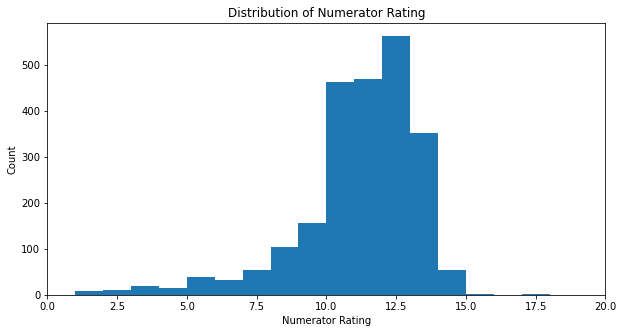

In [139]:
plt.figure(figsize=[10,5])
bin = np.arange(0, (tweet_arch_clean['rating_numerator'].max()+1), 1)
plt.hist(tweet_arch_clean.rating_numerator, bins = bin)
plt.xlim(0,20)
plt.xlabel('Numerator Rating')
plt.ylabel('Count')
plt.title('Distribution of Numerator Rating');

The chart is left distributed with majority of the rating falling between 7.5 and 15 

### What are the top 5 numerator rating for the dog tweet?

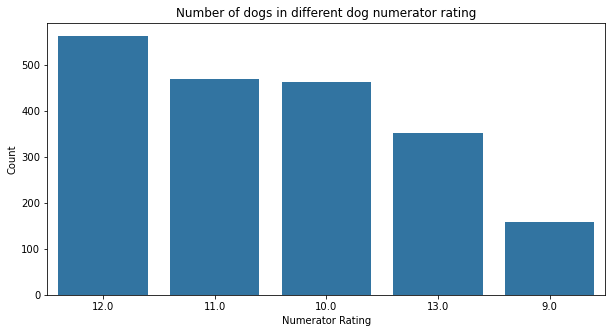

In [140]:
plt.figure(figsize=[10,5])
base_color = sns.color_palette()[0]
type_order = tweet_arch_clean['rating_numerator'].value_counts().iloc[:5].index
sns.countplot(data=tweet_arch_clean, x='rating_numerator', color=base_color, order = type_order)
plt.xlabel('Numerator Rating')
plt.ylabel('Count')
plt.title('Number of dogs in different dog numerator rating');

The most number of numerator rating is 12, followed by 11, 10, 13 and 9.

### What is the most common dog stage in the dataset?

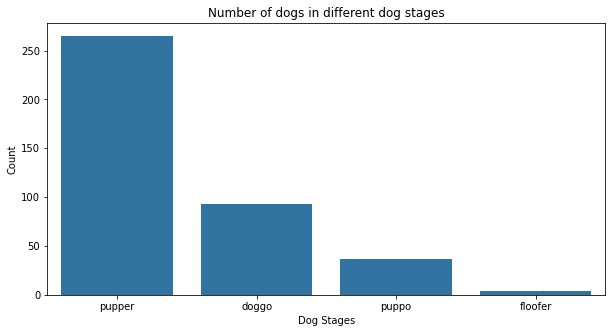

In [84]:
plt.figure(figsize=[10,5])
base_color = sns.color_palette()[0]
type_order = tweet_arch_clean['dog_stages'].value_counts().index
sns.countplot(data=tweet_arch_clean, x='dog_stages', color=base_color, order = type_order)
plt.xlabel('Dog Stages')
plt.ylabel('Count')
plt.title('Number of tweets in different dog stages');

Among the dog stages, pupper has the maximum number of dogs and floofer has the least number of dogs

### What is the most popular source for these tweet

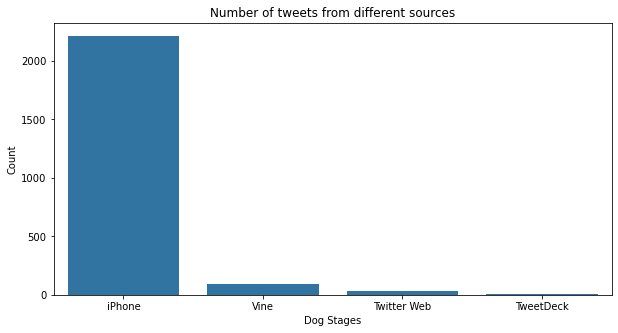

In [141]:
plt.figure(figsize=[10,5])
base_color = sns.color_palette()[0]
type_order = tweet_arch_clean['source'].value_counts().index
sns.countplot(data=tweet_arch_clean, x='source', color=base_color, order = type_order)
plt.xlabel('Dog Stages')
plt.ylabel('Count')
plt.title('Number of tweets from different sources');

The most popular source for the tweets are iPhone. Followed by Vine and Twitter web. The least popular source for the tweets are TweetDeck.

### What is the correlation between favorites and retweets?

Text(0.5, 1.0, 'Retweets and favorites Scatter plot')

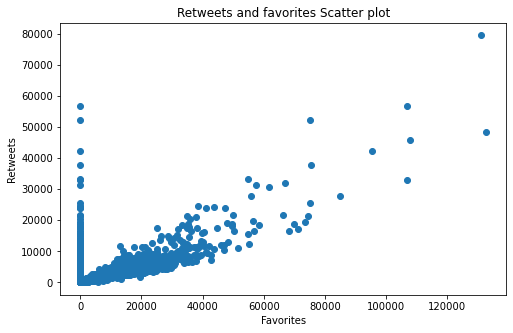

In [117]:
plt.figure(figsize=[8,5])
plt.scatter(tweet_arch_clean['favorites'], tweet_arch_clean['retweets'])
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')

There is a strong positive corelation between favorites and retweets.